In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import os
print(os.listdir("/var"))

['log', 'spool', 'lock', 'mail', 'backups', 'local', 'run', 'lib', 'cache', 'opt', 'tmp', 'bank (1).csv', 'colab']


In [ ]:
df = pd.read_csv("/var/bank (1).csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
len(df)

11162

In [ ]:
missing_values_percentage = df.isnull().sum() * 100 / len(df)
print(missing_values_percentage)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64


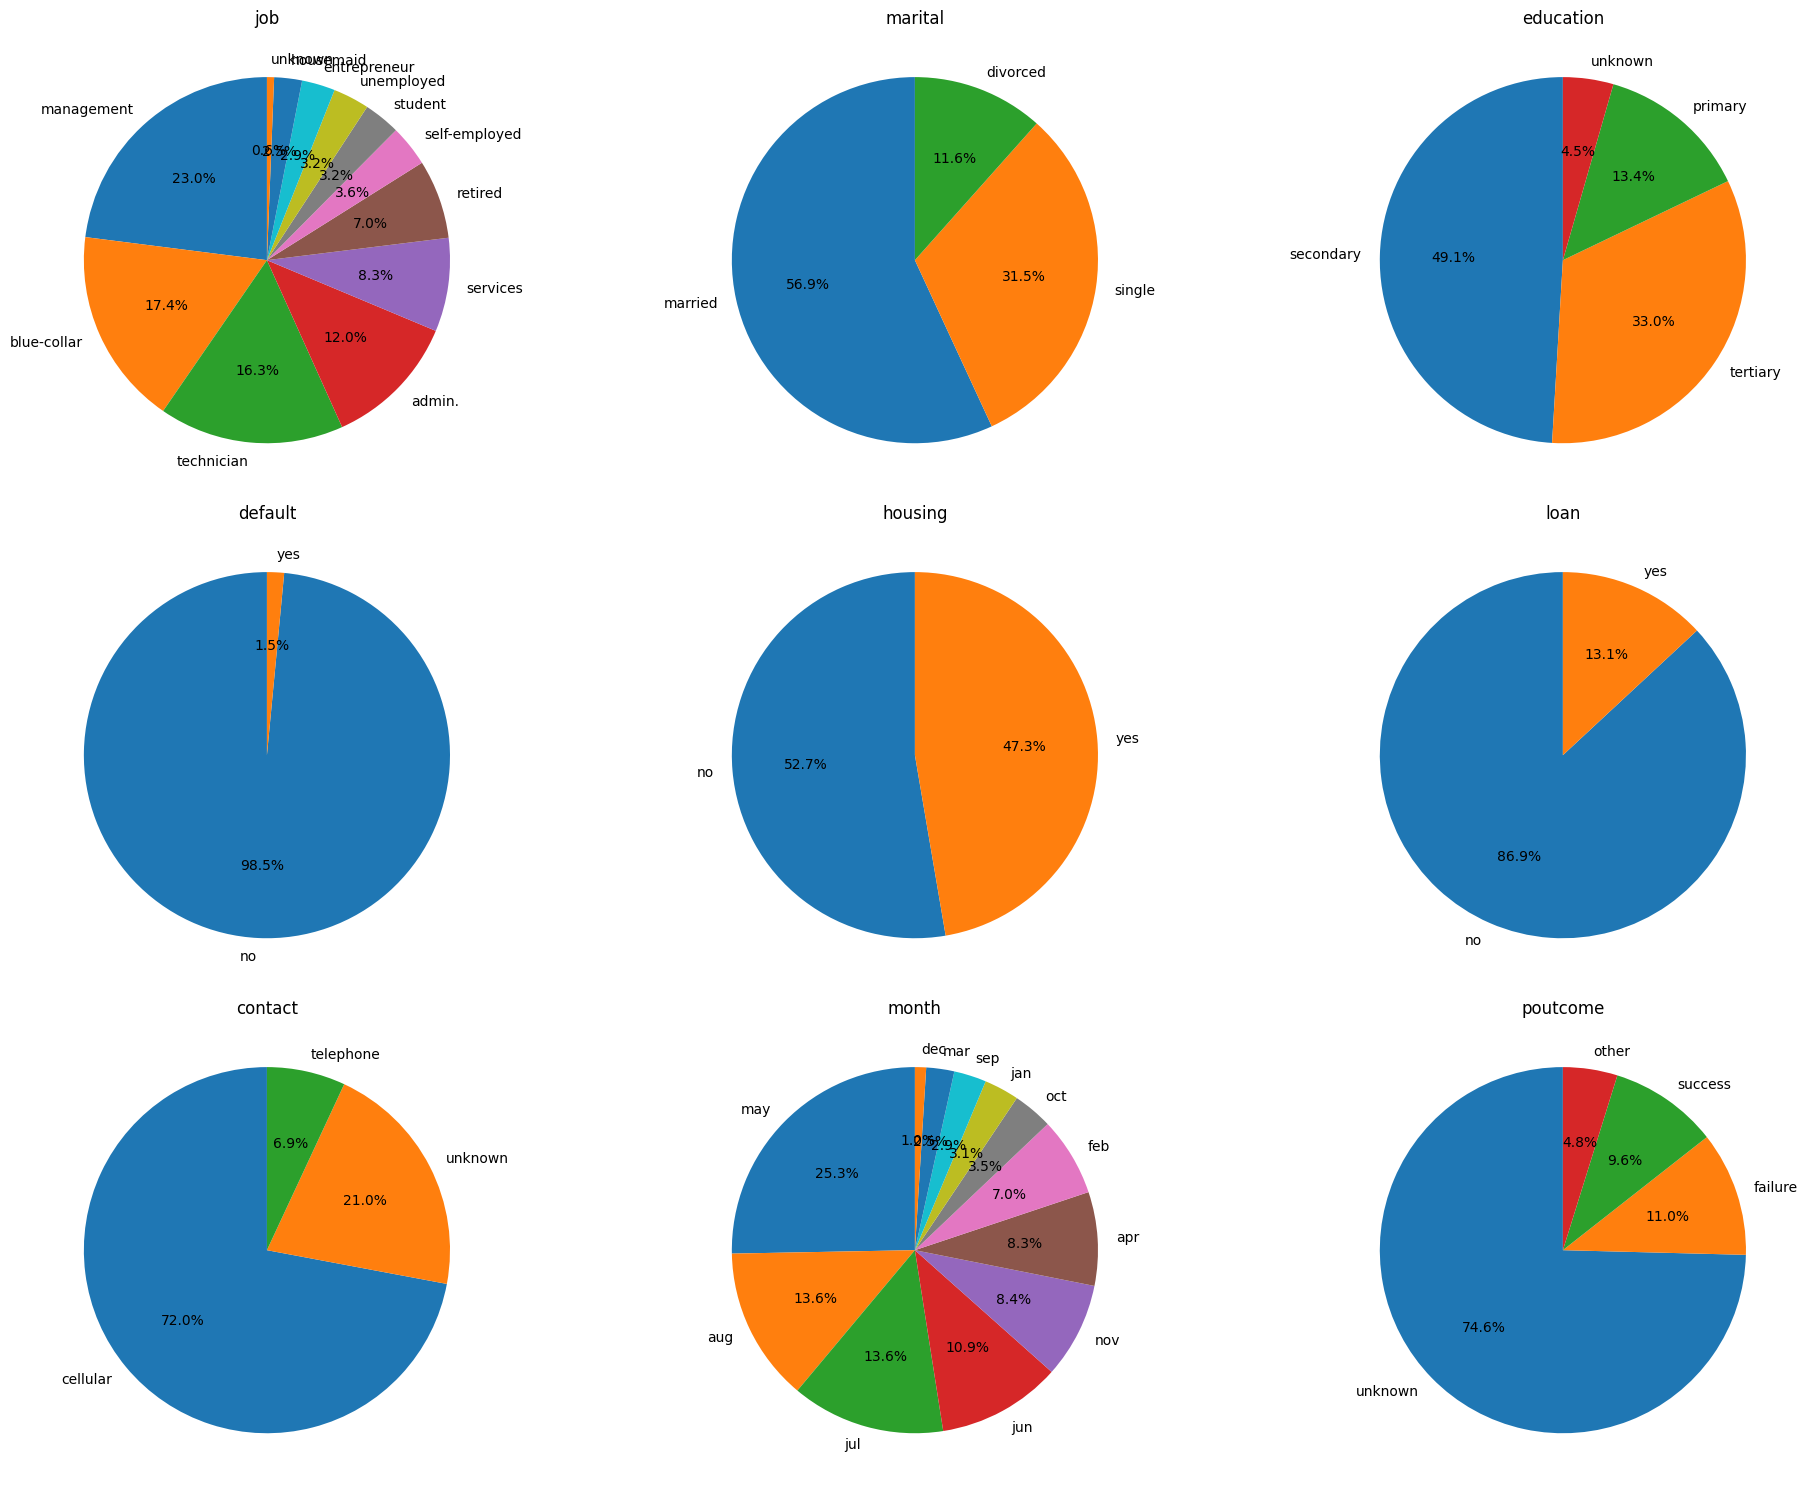

In [ ]:

cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axs = plt.subplots(3, 3, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3

    axs[trace_x, trace_y].pie(
        value_counts.values,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab10.colors
    )
    axs[trace_x, trace_y].set_title(cat_column)

    counter += 1

plt.tight_layout()
plt.show()
plt.show()

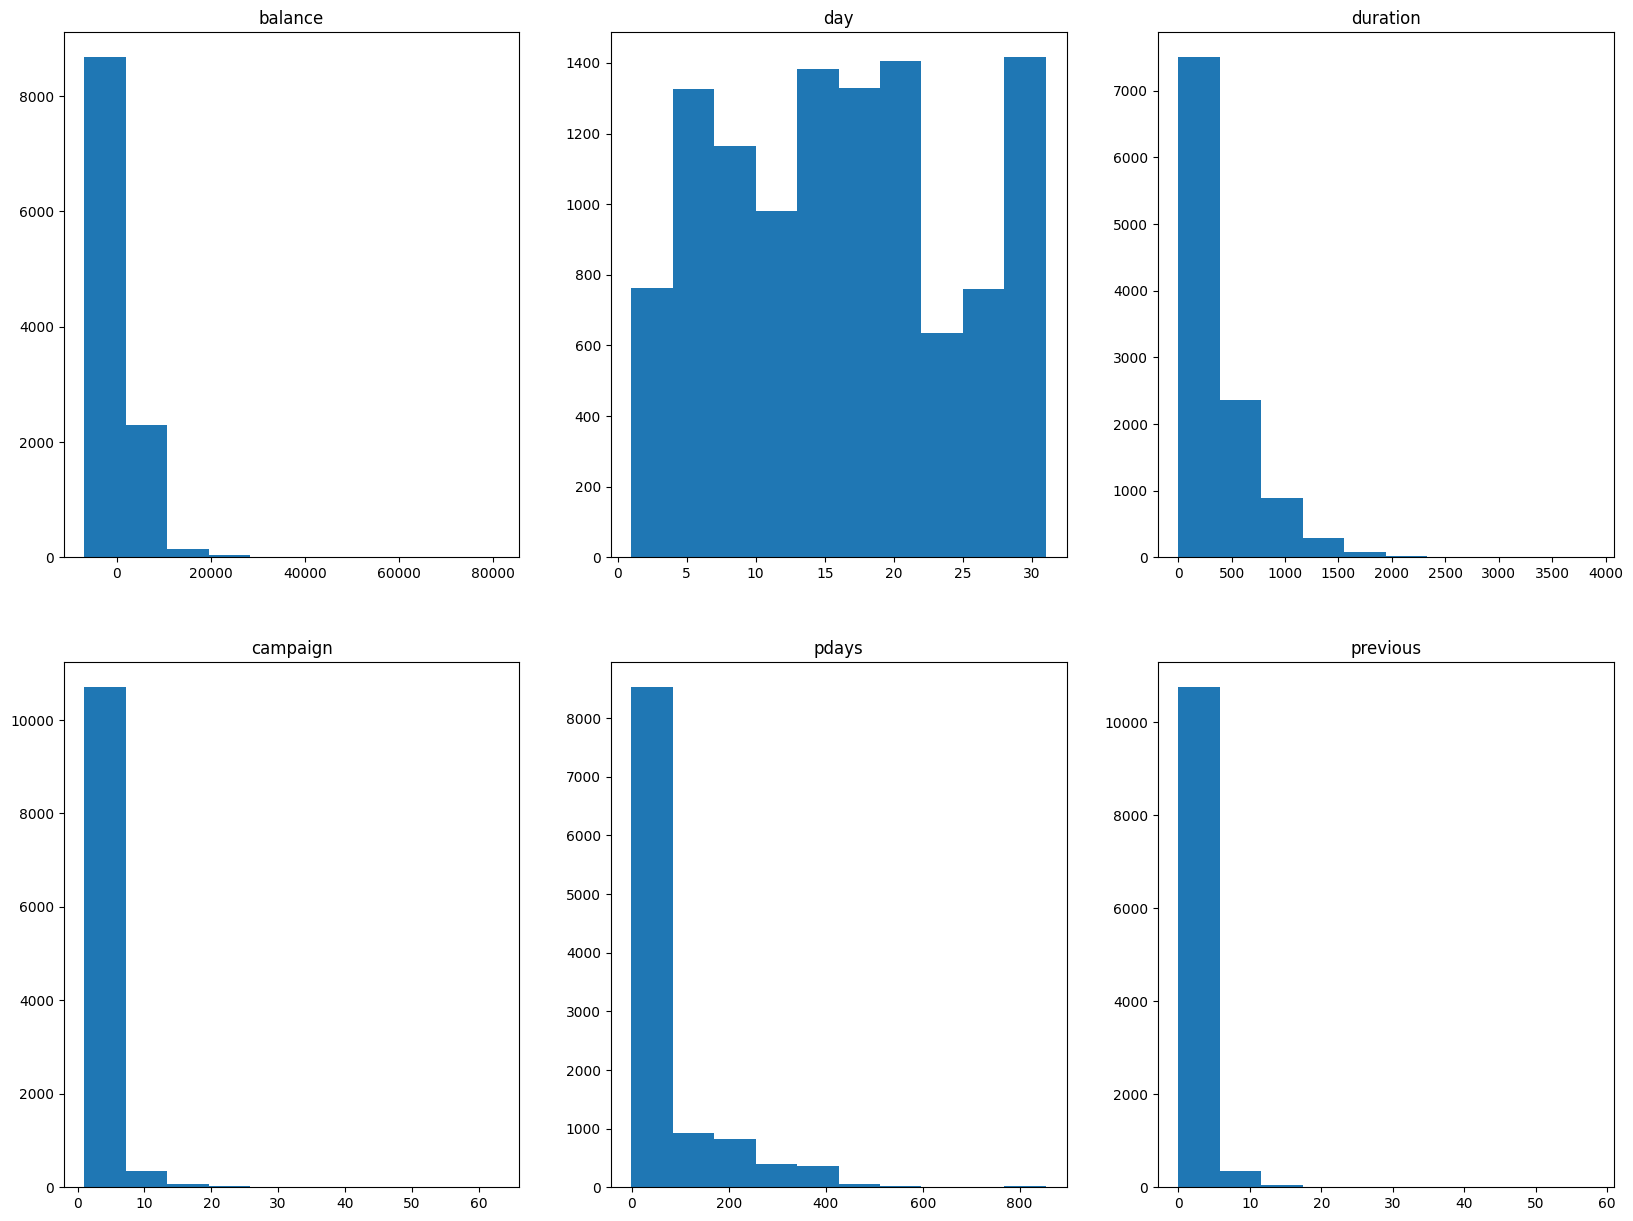

In [ ]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:

    trace_x = counter // 3
    trace_y = counter % 3

    axs[trace_x, trace_y].hist(df[num_column])

    axs[trace_x, trace_y].set_title(num_column)

    counter += 1

plt.show()

In [ ]:
# Outliers existence for pdays and campaign
len (df[df['pdays'] > 400] ) / len(df) * 100

1.2005017022039062

In [ ]:
# we did notice that the value -1 occur more 70% in this column thats why we did delete it
count_minus_1 = (df['pdays'] == -1).sum()

total_values = df['pdays'].shape[0]

percentage_minus_1 = (count_minus_1 / total_values) * 100

print(f"Percentage of -1 values: {percentage_minus_1}%")

Percentage of -1 values: 74.5744490234725%


In [ ]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.035835871707579285

In [ ]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.04479483963447411

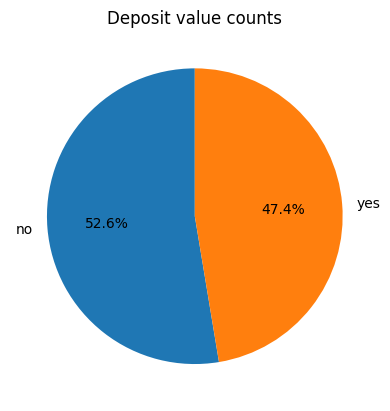

In [ ]:
value_counts = df['deposit'].value_counts()

value_counts.plot.pie(autopct='%1.1f%%', startangle=90, title='Deposit value counts')
plt.ylabel('')
plt.show()

<Axes: title={'center': 'Job and deposit'}, xlabel='job'>

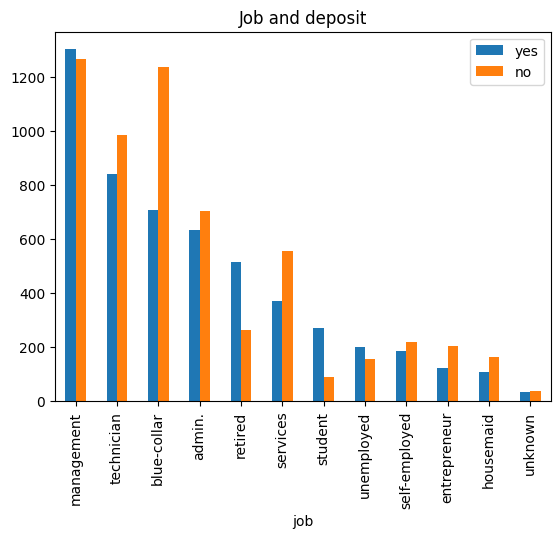

In [ ]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<Axes: title={'center': 'Type of contact and deposit'}, xlabel='contact'>

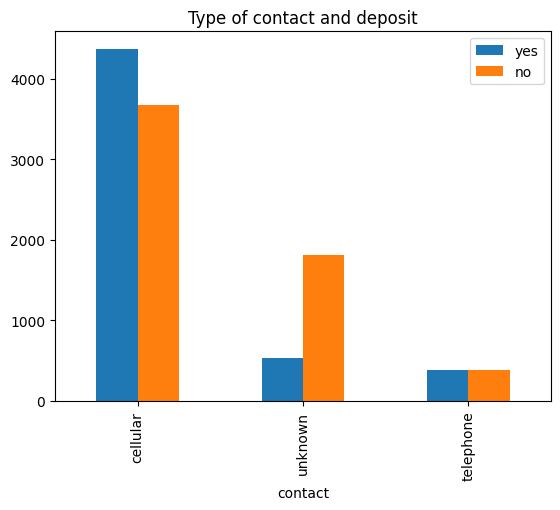

In [ ]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

<Axes: title={'center': 'Marital status and deposit'}, xlabel='marital'>

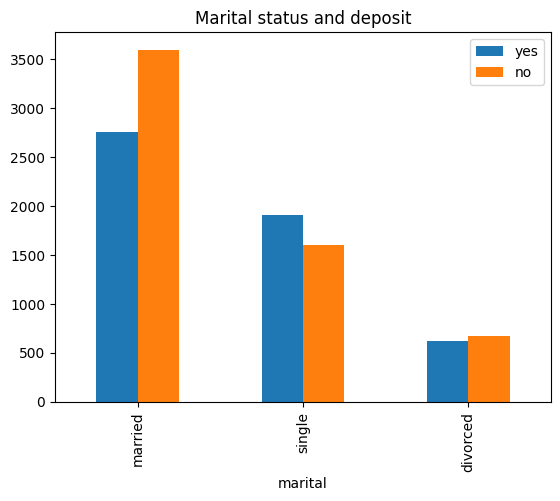

In [ ]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<Axes: title={'center': 'Type of contact and deposit'}, xlabel='contact'>

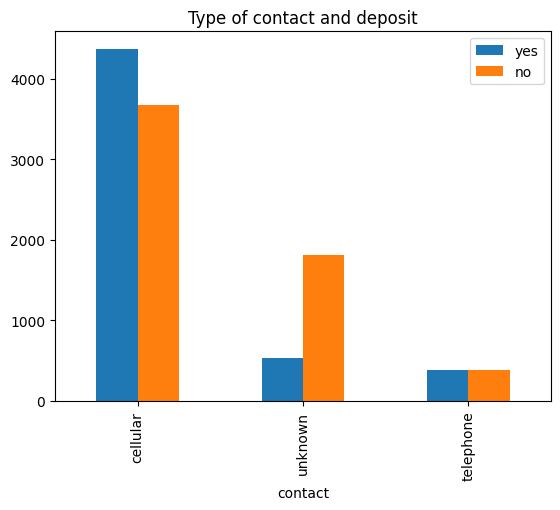

In [ ]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

In [ ]:
b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


<Axes: title={'center': 'Balance and deposit statistics'}>

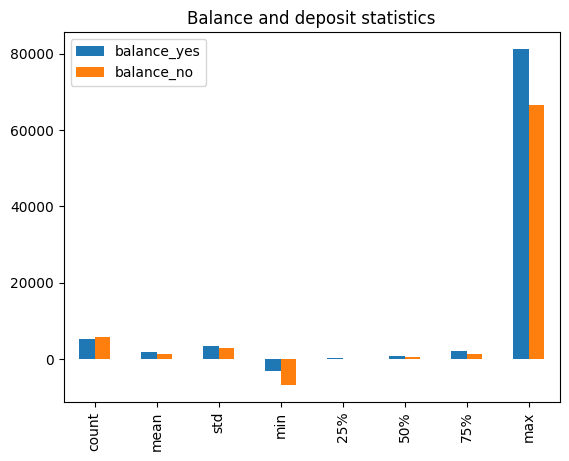

In [ ]:
b_df.plot.bar(title = 'Balance and deposit statistics')

In [ ]:
a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


<Axes: title={'center': 'Age and deposit statistics'}>

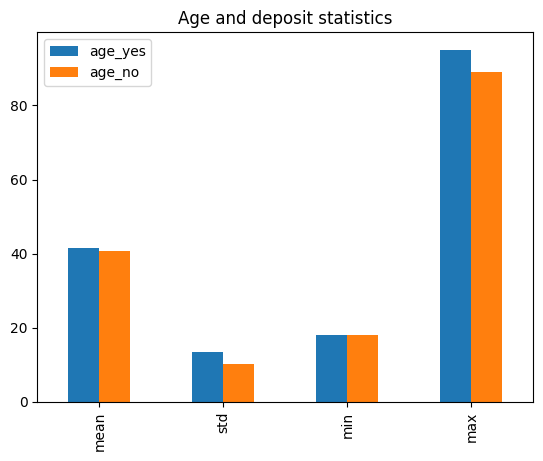

In [ ]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [ ]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<Axes: title={'center': 'Number of contacts performed during this campaign and deposit statistics'}>

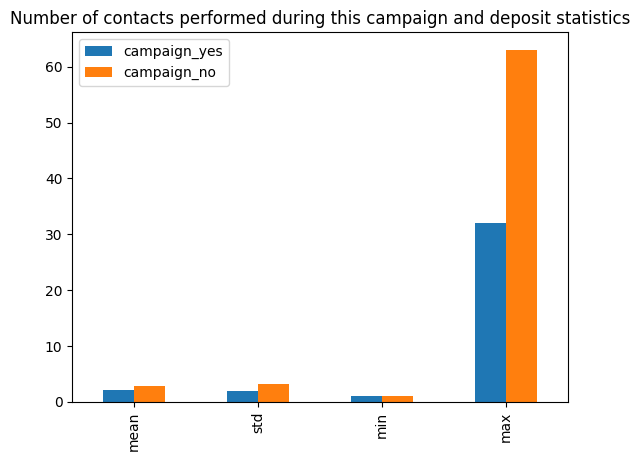

In [ ]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [ ]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


<Axes: title={'center': 'Number of contacts performed during previous campaign and deposit statistics'}>

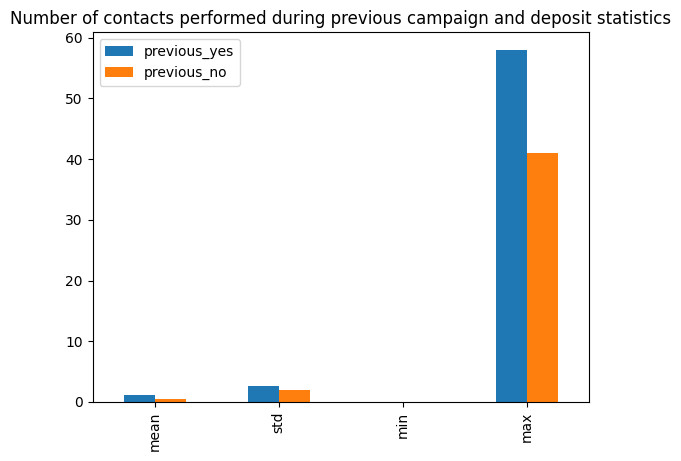

In [ ]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

In [ ]:
#Defining cleanup functions
def get_dummy_from_bool(row, column_name):
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

In [ ]:
def clean_data(df):
  cleaned_df = df.copy()
  bool_columns = ['default', 'housing', 'loan', 'deposit']
  for bool_col in bool_columns:
      cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)

  cleaned_df = cleaned_df.drop(columns = bool_columns)

  cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

  for col in  cat_columns:
      cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                              pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                              drop_first=True, dummy_na=False)], axis=1)
  cleaned_df = cleaned_df.drop(columns = ['pdays'])

  cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
  cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)

  cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])

  return cleaned_df

In [ ]:
cleaned_df = clean_data(df)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
1,56,45,5,1467,0,0,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
2,41,1270,5,1389,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
3,55,2476,5,579,0,1,0,1,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
4,54,184,5,673,0,0,0,1,False,False,...,False,True,False,False,False,False,False,True,2.0,0.0


In [ ]:
import json
filtered_df = cleaned_df[cleaned_df['deposit_bool'] == 0]

if not filtered_df.empty:
    first_row_dict = filtered_df.iloc[0].to_dict()

    json_data = json.dumps(first_row_dict)

    print(json_data)

{"age": 57, "balance": 604, "day": 19, "duration": 187, "default_bool": 0, "housing_bool": 0, "loan_bool": 0, "deposit_bool": 0, "job_blue-collar": false, "job_entrepreneur": false, "job_housemaid": false, "job_management": false, "job_retired": true, "job_self-employed": false, "job_services": false, "job_student": false, "job_technician": false, "job_unemployed": false, "job_unknown": false, "marital_married": false, "marital_single": true, "education_secondary": false, "education_tertiary": false, "education_unknown": false, "contact_telephone": false, "contact_unknown": false, "month_aug": false, "month_dec": false, "month_feb": false, "month_jan": false, "month_jul": false, "month_jun": false, "month_mar": false, "month_may": false, "month_nov": true, "month_oct": false, "month_sep": false, "poutcome_other": false, "poutcome_success": false, "poutcome_unknown": true, "campaign_cleaned": 1.0, "previous_cleaned": 0.0}


In [ ]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [ ]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000, random_state=RAND_STATE)

log_reg.fit(X_train, y_train.squeeze().values)

y_train_preds_log_reg = log_reg.predict(X_train)
y_test_preds_log_reg = log_reg.predict(X_test)

print('Logistic Regression accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds_log_reg),
        accuracy_score(y_test, y_test_preds_log_reg)))

In [ ]:
import xgboost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

# Fonction pour calculer toutes les métriques
def calculate_metrics(y_true, y_preds, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_preds),
        'precision': precision_score(y_true, y_preds),
        'recall': recall_score(y_true, y_preds),
        'f1': f1_score(y_true, y_preds),
        'roc_auc': roc_auc_score(y_true, y_proba)
    }

# Calcul des probabilités pour le calcul de l'AUC
y_train_proba = xgb.predict_proba(X_train)[:, 1]
y_test_proba = xgb.predict_proba(X_test)[:, 1]

# Calcul des métriques pour train et test
train_metrics = calculate_metrics(y_train, y_train_preds, y_train_proba)
test_metrics = calculate_metrics(y_test, y_test_preds, y_test_proba)

# Affichage des résultats
def print_metrics(metrics, dataset):
    print(f'\nXGB metrics for {dataset}:')
    for metric, value in metrics.items():
        print(f'{metric.capitalize()}: {value:.3f}')

# Affichage des résultats pour train et test
print_metrics(train_metrics, 'train')
print_metrics(test_metrics, 'test')


XGB metrics for train:
Accuracy: 0.914
Precision: 0.883
Recall: 0.942
F1: 0.911
Roc_auc: 0.977

XGB metrics for test:
Accuracy: 0.850
Precision: 0.825
Recall: 0.871
F1: 0.848
Roc_auc: 0.925


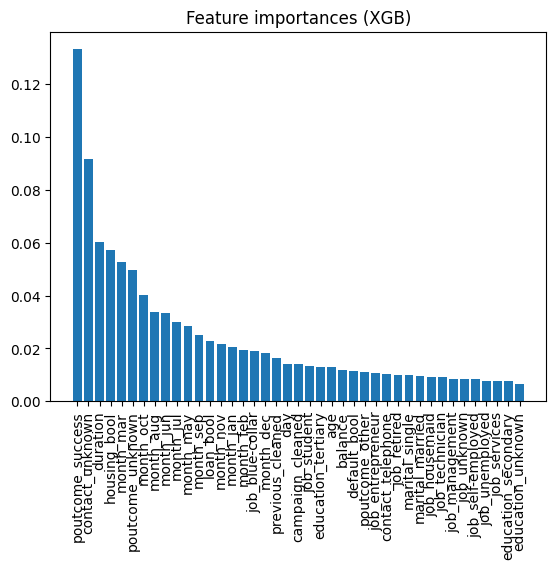

In [ ]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

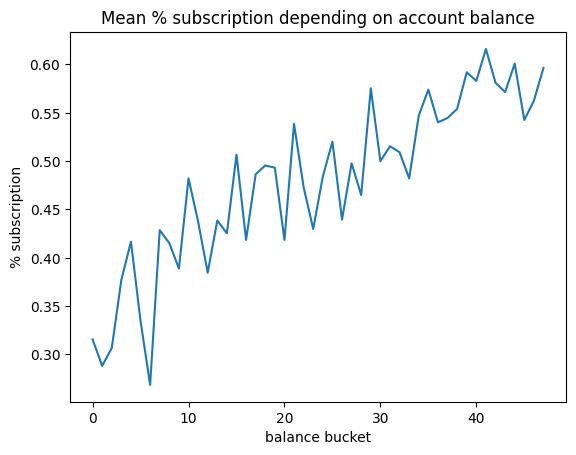

In [ ]:
df_new = cleaned_df.copy()

#introduce new column 'balance_buckets' to  ''
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [ ]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1490

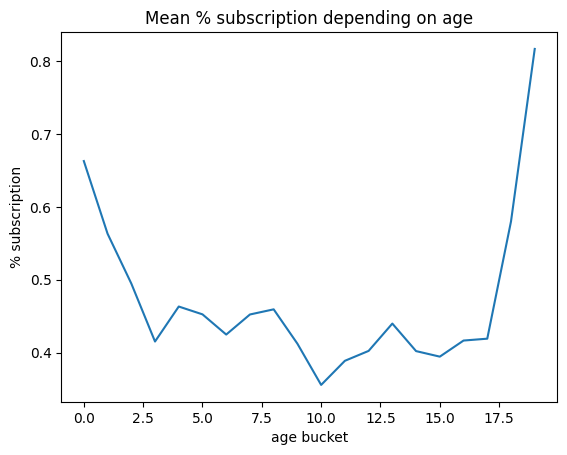

In [ ]:
#introduce new column 'age_buckets' to  ''
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [ ]:
df_new[df_new['age_buckets'] == 3]['age'].max()

31

In [ ]:
df_new[df_new['age_buckets'] == 17]['age'].min()

56

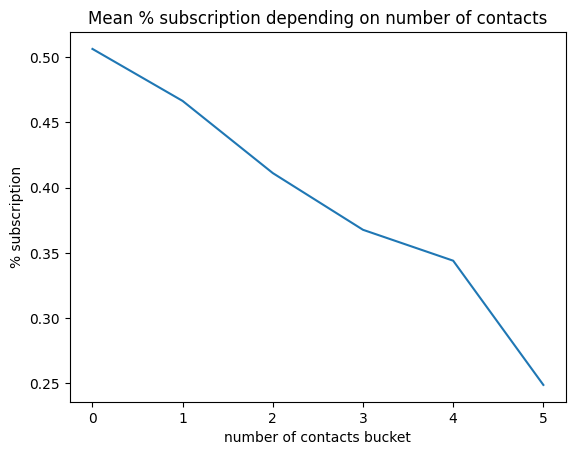

In [ ]:
#introduce new column 'age_buckets' to  ''
df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_campaign = df_new.groupby(['campaign_buckets'])['deposit_bool'].mean()

#plot average campaign outcome per bucket
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('Mean % subscription depending on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('% subscription')
plt.show()

In [ ]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0

In [ ]:
import joblib
joblib.dump(xgb, 'xgb_model.pkl')

['xgb_model.pkl']